In [1]:
import sys
import pandas as pd
import numpy as np
import os, inspect

sys.path.append('C:\\Users\\alicj\\Documents\\GitHub\\RGCPD')

from RGCPD.class_BivariateMI import BivariateMI
import class_BivariateMI, functions_pp
from stat_models_cont import ScikitModel
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegressionCV
from pipeline.data_preparations import coordinates, data_steps, mean, xarray, month, data_prep
import func_models as fc_utils
from pipeline.pipeline import pipeline
from RGCPD import core_pp
from pipeline.prediction import pred

%load_ext autoreload
%autoreload 2

# main directory is the directory of this notebook
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) 

# my main directory (which contains folders with data etc)
my_main_dir = 'C:\\Users\\alicj\\Desktop\\WORK'
data_path = os.path.join(my_main_dir, 'data')
district_data_path = os.path.join(data_path, 'district')

Not able to load in plotting modules, check installment of networkx


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

## define parameters

In [10]:
function = class_BivariateMI.corr_map
alpha = 0.01
FDR_control = True 
distance_eps = 500
min_area_in_degrees2 = 5
tfreq = None

TVdates_aggr = False
ext_annual_to_mon = False 
method = 'leave_1'
#method = 'random_10'
detrend = True
labels = True
pred_type = 'continuous'
name = 'rainfall'

# choose type prediciton (continuous or probabilistic) by making comment #
#prediction = 'continuous'   
prediction = 'events'

# choose drought severity
q = 0.33
q = 0.15

### define path that don't change (only target variable data is different for different target periods)

In [11]:
# directory of precursor data
prec_path = os.path.join(data_path,'sst_1950-2020_1_12_monthly_1.0deg.nc')

# directory for test data 
path_test = os.path.join(my_main_dir, 'test')

# directory for output
output_path = os.path.join(my_main_dir, 'out')


# OND

for the target period OND, the start_end_year and start_end_TVyear do not change (there is no crossyr)

In [12]:
# directory of target variable data
TV_path = os.path.join(district_data_path, 'changara_ond.nc')

list_of_name_path = [(1, TV_path), ('sst', prec_path)]

#### 1 month lead time (SON)

In [13]:
start_end_year = (1981, 2020)
start_end_TVyear = (1981, 2020)

lags = np.array([['09-01', '11-01']])            
periodnames = ['SON']                                         
start_end_TVdate = ('10-01', '12-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2020] ('09-01', '11-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(39dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
c:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
c:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag SON
Plotting Corr maps sst_labels_init, split 0, lag SON

Getting MI timeseries
There are [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] regions in total (list of different splits)


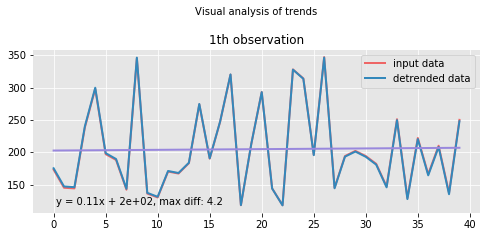

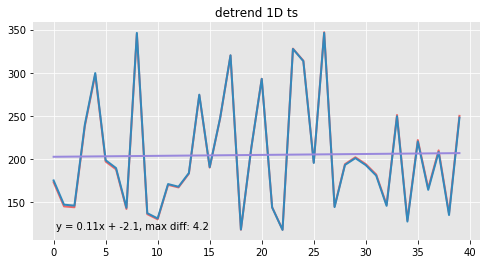

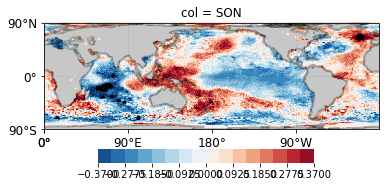

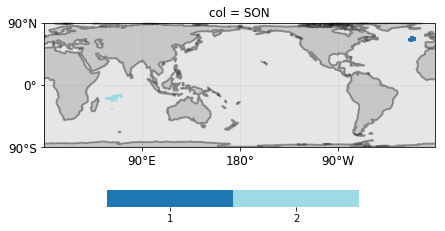

In [14]:
rg_changara_ond1 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)


In [15]:
rg_changara_ond1.auc15, rg_changara_ond1.bss15 = pred(rg_changara_ond1, q = 0.15)
rg_changara_ond1.auc33, rg_changara_ond1.bss33 = pred(rg_changara_ond1, q = 0.33)

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (mi

LogisticRegression 
 Test score
 BSS -0.12
 AUC 0.13 
Train score
 BSS 0.04
 AUC 0.69
LogisticRegression 
 Test score
 BSS 0.13
 AUC 0.72 
Train score
 BSS 0.35
 AUC 0.85


### 2 months lead time (ASO)

In [16]:
lags = np.array([['08-01', '10-01']])            
periodnames = ['ASO']                                         
start_end_TVdate = ('10-01', '12-01') 

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2020] ('08-01', '10-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(39dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
c:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
c:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag ASO
Plotting Corr maps sst_labels_init, split 0, lag ASO

Getting MI timeseries
There are [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] regions in total (list of different splits)


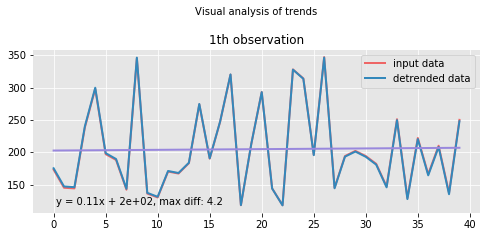

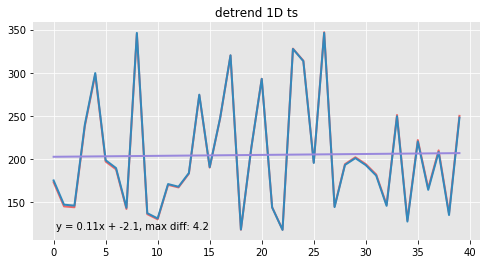

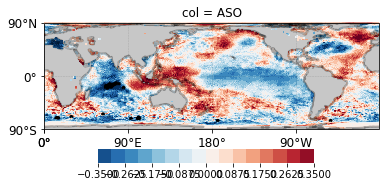

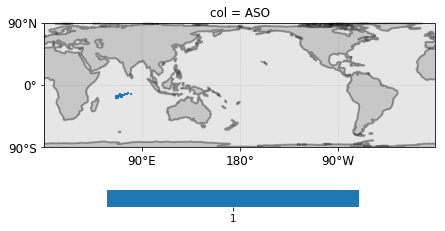

In [17]:
rg_changara_ond2 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [18]:
rg_changara_ond2.auc15, rg_changara_ond2.bss15 = pred(rg_changara_ond2, q = 0.15)
rg_changara_ond2.auc33, rg_changara_ond2.bss33 = pred(rg_changara_ond2, q = 0.33)

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (mi

LogisticRegression 
 Test score
 BSS -0.12
 AUC 0.30 
Train score
 BSS 0.07
 AUC 0.69
LogisticRegression 
 Test score
 BSS 0.06
 AUC 0.66 
Train score
 BSS 0.22
 AUC 0.76
